In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('data/diamonds.csv')

In [3]:
df=df.drop(columns=['Unnamed: 0'])

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# melihat tipe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# melihat nama kolom

In [6]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# melihat apakah ada data kosong

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# membuat label unutk cut,color,clarity dg label sbg berikut
## Nilai yang diberikan untuk kategori dalam cut adalah sebagai berikut:
- 0: Fair
- 1: Good
- 2: Ideal
- 3: Premium
- 4: Very Good
## Nilai yang diberikan untuk kategori dalam color adalah sebagai berikut:
- 0: D
- 1: E
- 2: F
- 3: G
- 4: H
- 5: I
- 6: J
## Nilai yang diberikan untuk kategori dalam clarity adalah sebagai berikut:
- 0: I1
- 1: IF
- 2: SI1
- 3: SI2
- 4: VS1
- 5: VS2
- 6: VVS1
- 7: VVS2

In [8]:
#membuat label unutk cut,color,clarity
label_encoders = {
    'cut': LabelEncoder(),
    'color': LabelEncoder(),
    'clarity': LabelEncoder()
}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])


In [9]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# menhitung mean

In [ ]:
def calculate_mean(data):
    return sum(data) / len(data)

columns_mean = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z']

for column in columns_mean:
    mean_value = calculate_mean(df[column])
    print(f"Mean {column}: {mean_value}")

Mean carat: 0.7979397478679852
Mean cut: 2.5530033370411567
Mean color: 2.5941972562106046
Mean clarity: 3.835150166852058
Mean depth: 61.74940489432624
Mean table: 57.45718390804603
Mean price: 3932.799721913237
Mean x: 5.731157211716609
Mean y: 5.734525954764462
Mean z: 3.5387337782723316


# menghitung mean

In [14]:
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        median = sorted_data[n//2]
    return median

columns_median = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z']
for column in columns_median:
    median_value = calculate_median(df[column])
    print(f"Median {column}: {median_value}")

Median carat: 0.7
Median cut: 2.0
Median color: 3.0
Median clarity: 4.0
Median depth: 61.8
Median table: 57.0
Median price: 2401.0
Median x: 5.7
Median y: 5.71
Median z: 3.53


# menhitung modus

In [15]:
df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,2,3,2,62.0,56.0,605,4.37,4.34,2.7


# menhitung modus manual

In [16]:
from collections import Counter

def calculate_modus(data):
    frequency = Counter(data)
    max_count = max(frequency.values())
    mode = [key for key, count in frequency.items() if count == max_count]
    return mode

columns_modus = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z']

for column in columns_modus:
    modus_value = calculate_modus(df[column])
    print(f"Modus {column}: {modus_value}")

Modus carat: [0.3]
Modus cut: [2]
Modus color: [3]
Modus clarity: [2]
Modus depth: [62.0]
Modus table: [56.0]
Modus price: [605]
Modus x: [4.37]
Modus y: [4.34]
Modus z: [2.7]


# menhitung range

In [17]:
def calculate_range(data):
    return max(data) - min(data)

columns_range = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z']

for column in columns_range:
    range_value = calculate_range(df[column])
    print(f"range {column}: {range_value}")

range carat: 4.81
range cut: 4
range color: 6
range clarity: 7
range depth: 36.0
range table: 52.0
range price: 18497
range x: 10.74
range y: 58.9
range z: 31.8


# menhitung Variance

In [18]:
def calculate_variance(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return variance

columns_variance = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z']

for column in columns_variance:
    variance_value = calculate_variance(df[column])
    print(f"variance {column}: {variance_value}")

variance carat: 0.22468249433034185
variance cut: 1.0561635791502535
variance color: 2.893703814260623
variance clarity: 2.974159348974718
variance depth: 2.052365793420936
variance table: 4.992855510484603
variance price: 15915334.36257625
variance x: 1.258323844398193
variance y: 1.30444743008271
variance z: 0.49800162990463775


# menhitung STD

In [19]:
import math

def calculate_std_deviation(data):
    variance = calculate_variance(data)
    std_deviation = math.sqrt(variance)
    return std_deviation

columns_std = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z']

for column in columns_std:
    std_value = calculate_std_deviation(df[column])
    print(f"std {column}: {std_value}")

std carat: 0.47400685050992863
std cut: 1.027698194583533
std color: 1.701089008329847
std clarity: 1.7245751212906668
std depth: 1.4326080390047153
std table: 2.2344698499833475
std price: 3989.402757628797
std x: 1.1217503485170812
std y: 1.1421240869899865
std z: 0.7056923054027426


# menhitung kurtosis dan skewness dg lib

In [20]:
kurtosis_pandas = df.kurt()
print("Hasil Kurtosis (Pandas):\n",kurtosis_pandas)
skewness_pandas = df.skew()
print("hasil Skewness (Pandas):\n",skewness_pandas)

Hasil Kurtosis (Pandas):
 carat       1.256635
cut        -0.465953
color      -0.866762
clarity    -0.820874
depth       5.739415
table       2.801857
price       2.177696
x          -0.618161
y          91.214557
z          47.086619
dtype: float64
hasil Skewness (Pandas):
 carat      1.116646
cut       -0.187443
color      0.189366
clarity    0.174917
depth     -0.082294
table      0.796896
price      1.618395
x          0.378676
y          2.434167
z          1.522423
dtype: float64


# menhitung Kurtosis manual

In [21]:
def calculate_kurtosis(data):
    mean = calculate_mean(data)
    std_deviation = calculate_std_deviation(data)
    n = len(data)
    kurtosis = (sum((x - mean) ** 4 for x in data) / n) / (std_deviation ** 4) - 3
    return kurtosis

columns_kurtosis = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y','z']

for column in columns_kurtosis:
    kurtosis_value = calculate_kurtosis(df[column])
    print(f"kurtosis {column}: {kurtosis_value}")

kurtosis carat: 1.2564076184375592
kurtosis cut: -0.4660208689986858
kurtosis color: -0.8667930854066435
kurtosis clarity: -0.8209090480328585
kurtosis depth: 5.738771345087498
kurtosis table: 2.8014859143633704
kurtosis price: 2.1773826690569047
kurtosis x: -0.6182146042768459
kurtosis y: 91.20599095863493
kurtosis z: 47.08214348390437


# menhitung skesnes manual

In [22]:
def calculate_skewness(data):
    mean = calculate_mean(data)
    std_deviation = calculate_std_deviation(data)
    n = len(data)
    skewness = (sum((x - mean) ** 3 for x in data) / n) / (std_deviation ** 3)
    return skewness

columns_skewness = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z']

for column in columns_skewness:
    skewness_value = calculate_skewness(df[column])
    print(f"skewness {column}: {skewness_value}")

skewness carat: 1.11661486812839
skewness cut: -0.18743777174061763
skewness color: 0.18936064464493949
skewness clarity: 0.1749118135164254
skewness depth: -0.0822917377945967
skewness table: 0.7968736878800259
skewness price: 1.618350277605361
skewness x: 0.3786658120774808
skewness y: 2.434099025011592
skewness z: 1.5223802221845761


# melihat sebaran data

<Figure size 1500x1000 with 0 Axes>

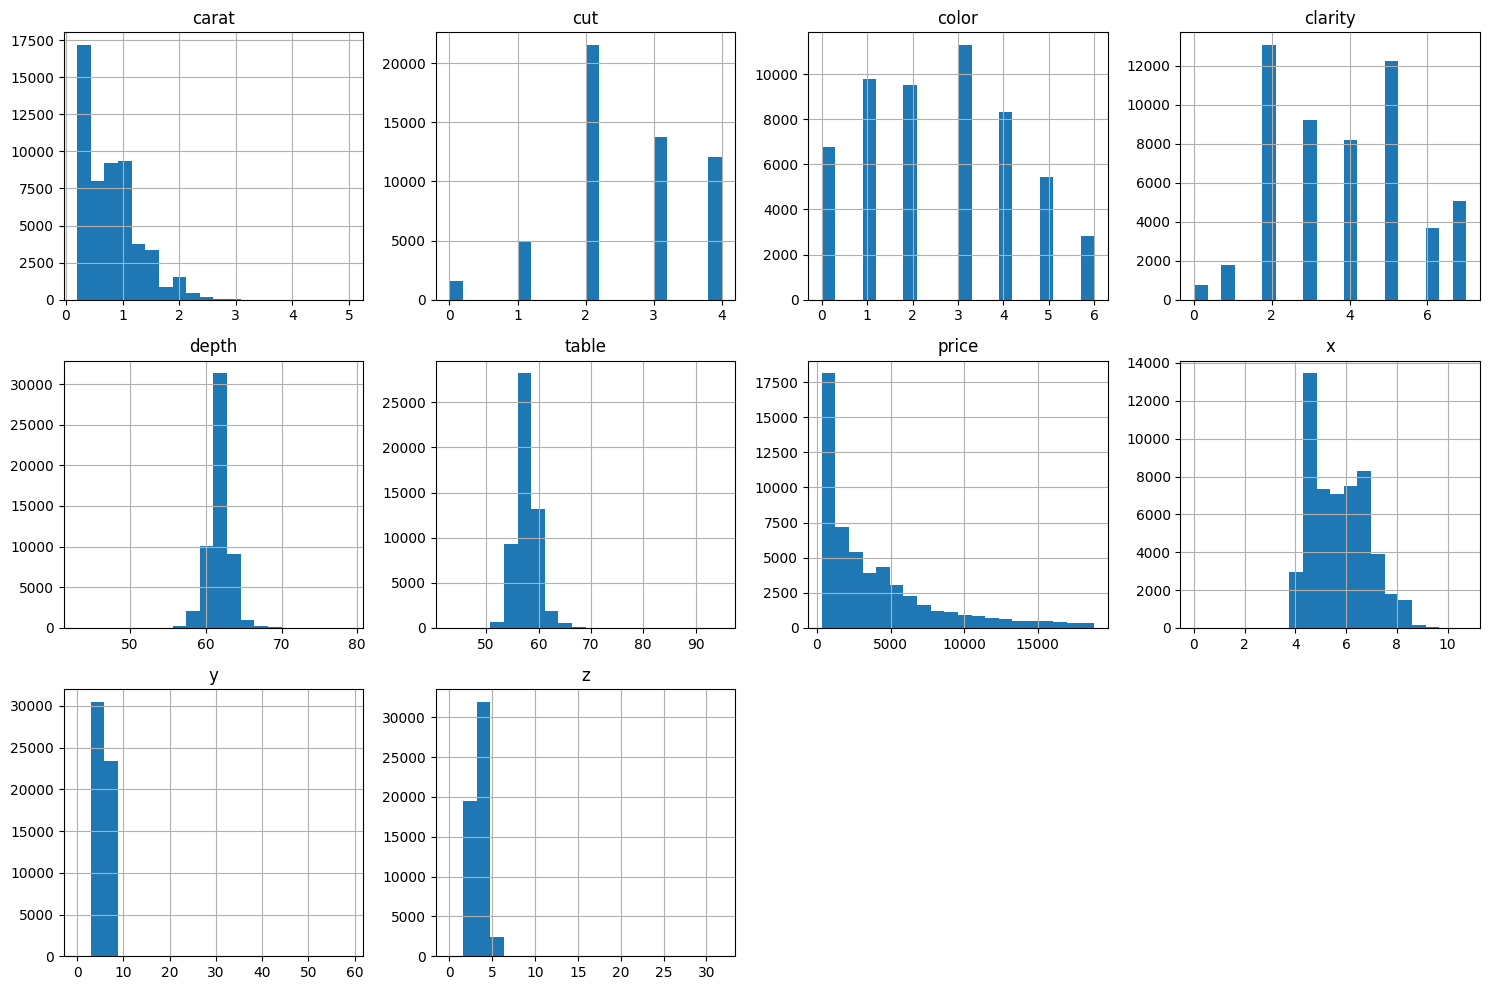

In [23]:
plt.figure(figsize=(15, 10))

df.hist(bins=20, figsize=(15, 10), layout=(3, 4))

plt.tight_layout()
plt.show()

# melihat outlier data

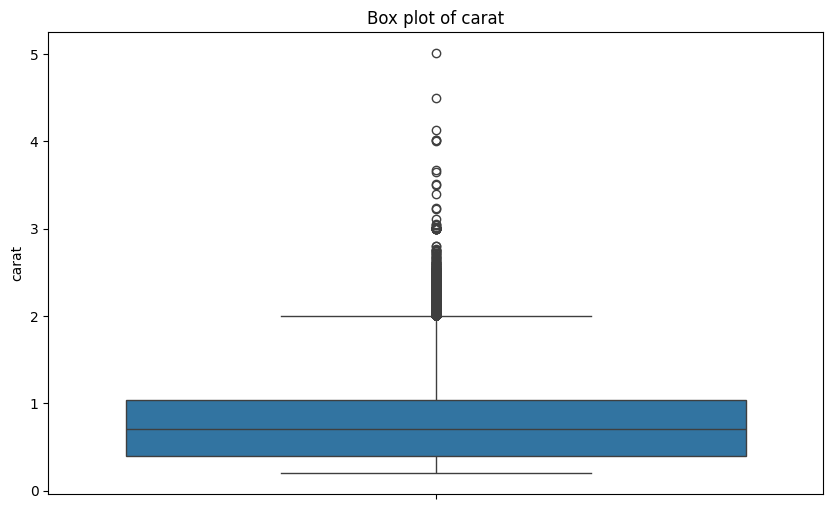

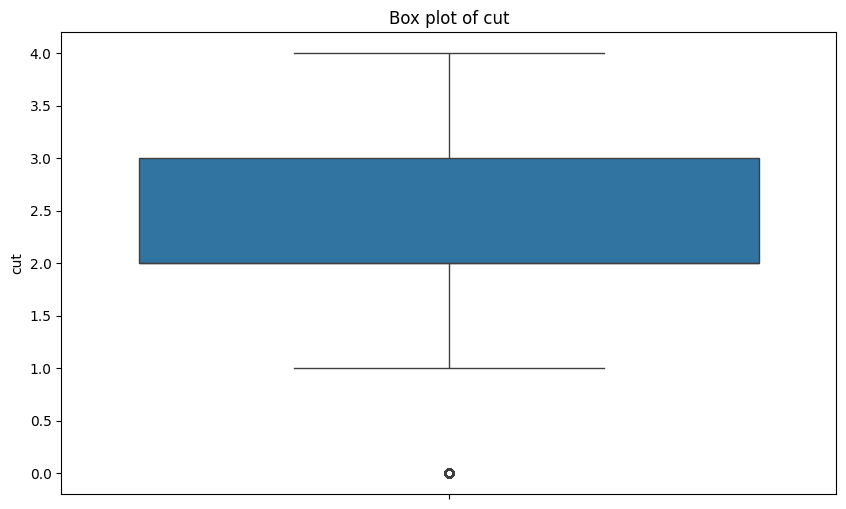

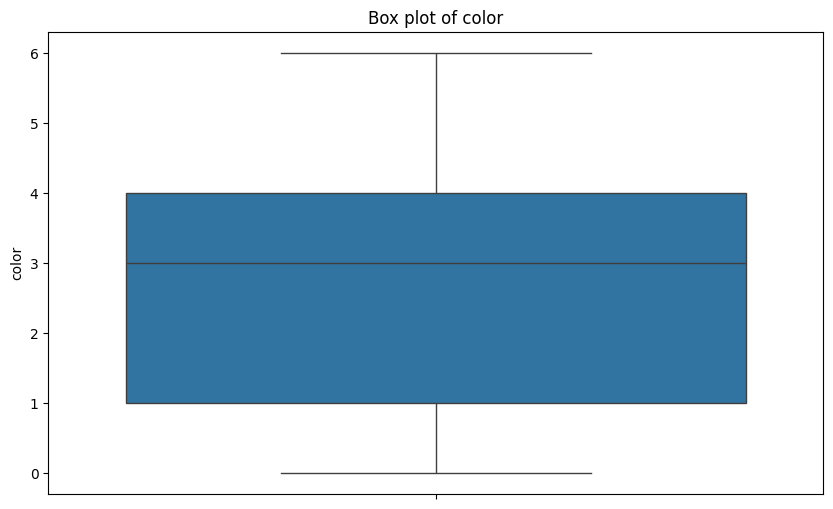

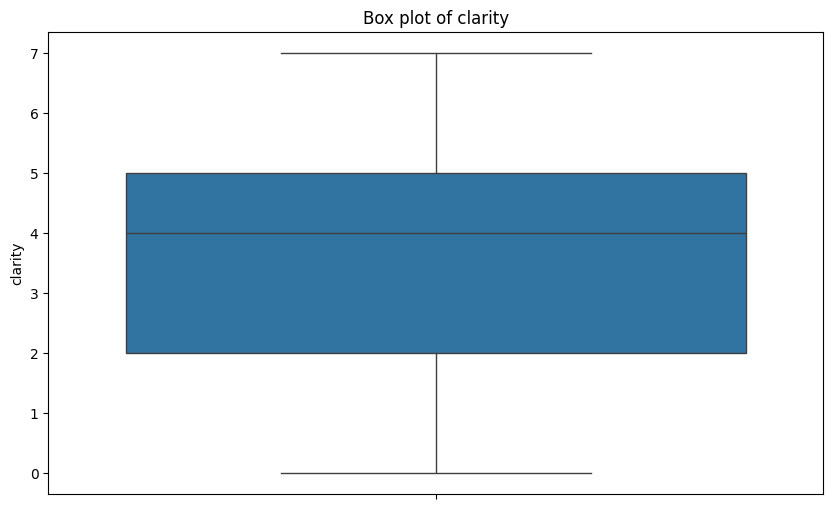

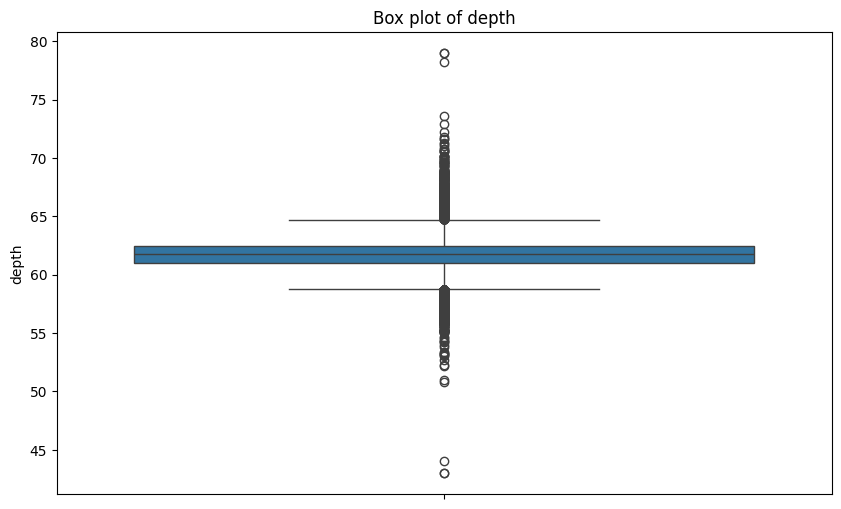

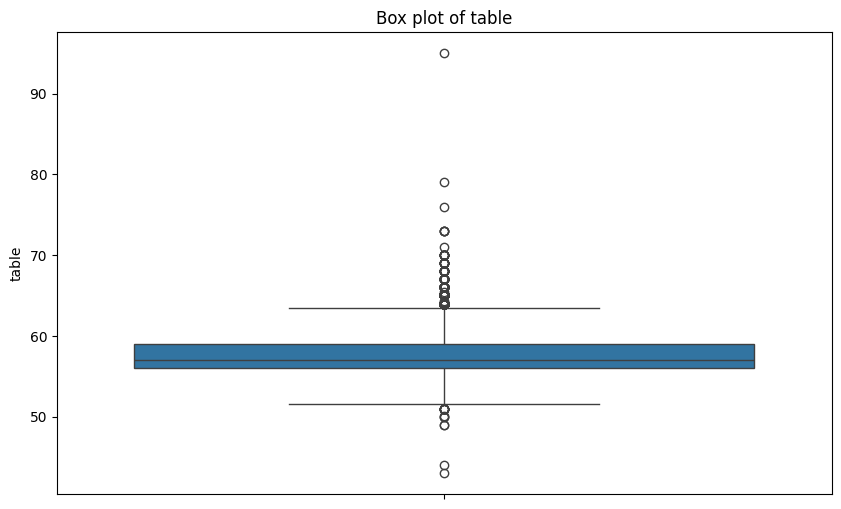

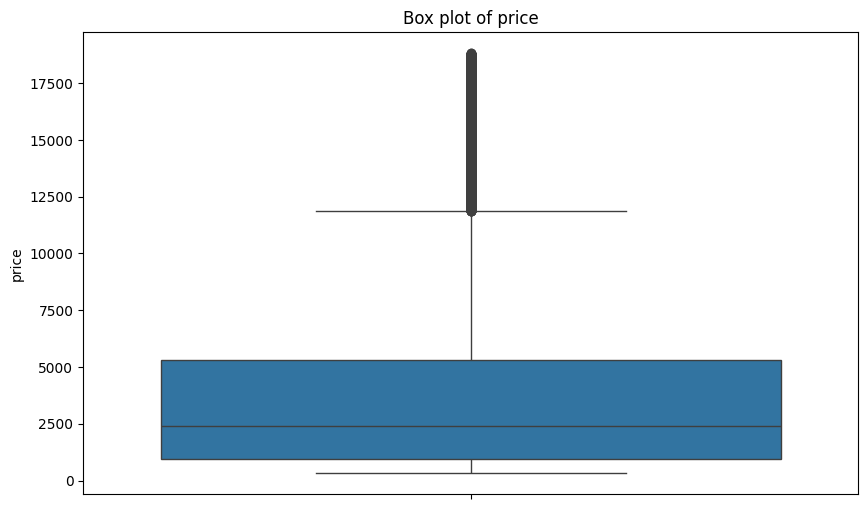

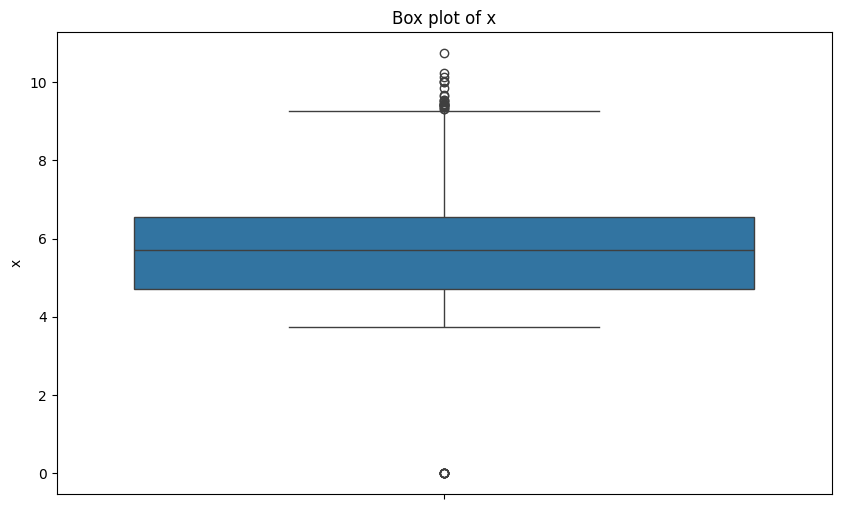

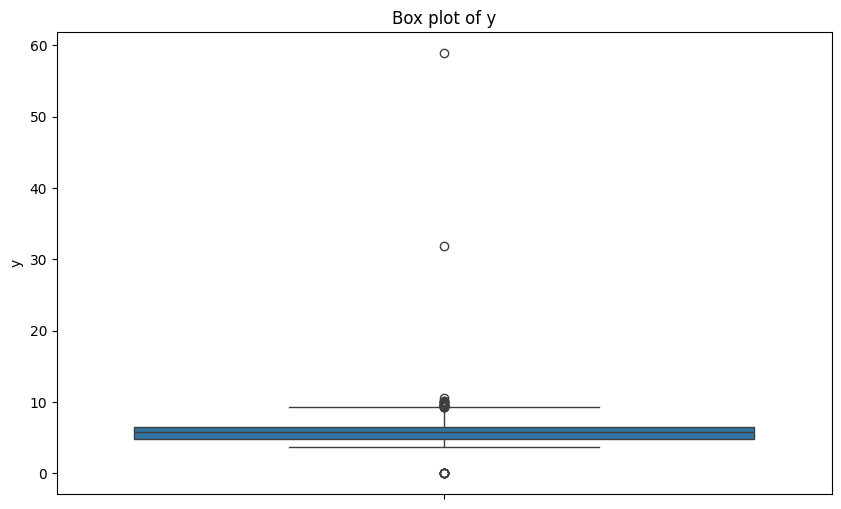

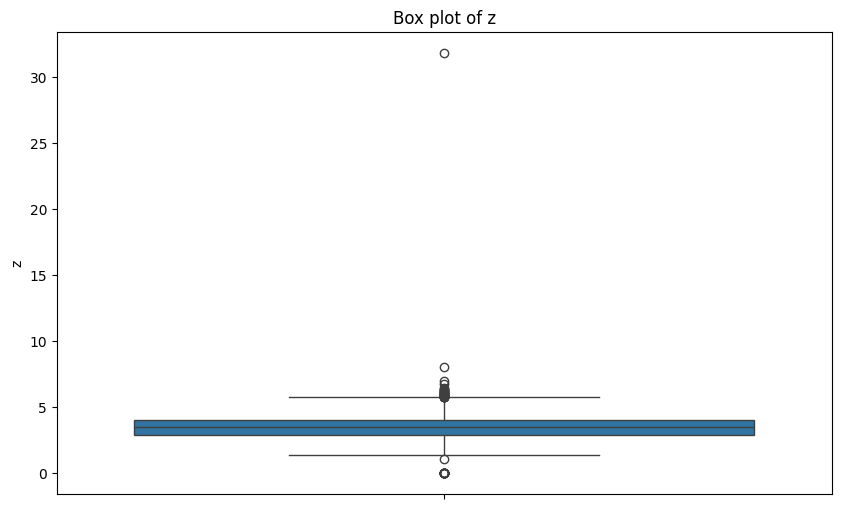

Number of rows with outliers: 2350
Shape of data without outliers: (51590, 10)


In [24]:
import seaborn as sns
import numpy as np

# Box plot untuk mendeteksi outlier
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Menggunakan z-score untuk mendeteksi outlier
from scipy.stats import zscore

numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
outliers = (z_scores > 3).any(axis=1)

# Data tanpa outlier
df_no_outliers = df[~outliers]
print(f'Number of rows with outliers: {outliers.sum()}')
print(f'Shape of data without outliers: {df_no_outliers.shape}')


# melihat korelasi dg heatmap

<Axes: >

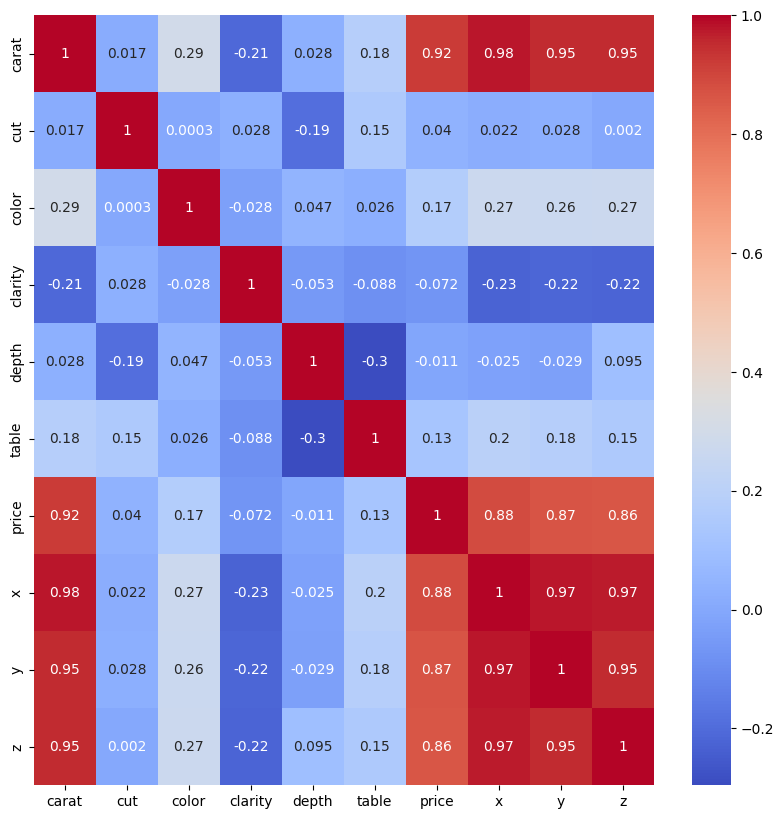

In [25]:
corr = df.corr()
fig = plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, cmap="coolwarm")

# menghitung korelsai person

In [26]:
import numpy as np
import pandas as pd

# Fungsi untuk menghitung Pearson menggunakan numpy
def calculate_Pearson(x1, y1):
    return np.corrcoef(x1, y1)[0, 1]

# Kolom yang ingin dihitung korelasinya
columns_Pearson = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# Periksa apakah ada missing values, dan jika ada, tangani
df = df.fillna(0)  # Atau Anda bisa menggunakan strategi yang lebih tepat untuk menangani missing values

# Hitung dan tampilkan korelasi Pearson antara setiap kolom dan 'price'
for column in columns_Pearson:
    Pearson_value = calculate_Pearson(df[column], df['price'])
    print(f"Pearson correlation antara {column} dan price: {Pearson_value}")


Pearson correlation antara carat dan price: 0.921591301193476
Pearson correlation antara cut dan price: 0.039860290913308664
Pearson correlation antara color dan price: 0.17251092815346736
Pearson correlation antara clarity dan price: -0.0715349699312532
Pearson correlation antara depth dan price: -0.010647404584142985
Pearson correlation antara table dan price: 0.12713390212174205
Pearson correlation antara price dan price: 1.0
Pearson correlation antara x dan price: 0.8844351610161268
Pearson correlation antara y dan price: 0.8654208978641876
Pearson correlation antara z dan price: 0.8612494438514484


## persiapan data (data preprocessing)

In [27]:
X = df.drop('price', axis=1)
y = df['price']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 9)
(10788, 9)
(43152,)
(10788,)


# membuat model LinearRegression dg lib

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred_LR = model.predict(X_test)
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Koefisien regresi:", coefficients)

Intercept: 3939.490707267337
Koefisien regresi: [ 5203.33986431    73.92846538  -456.44234465   493.82782116
  -222.3659396   -210.44255189 -1310.86817532    27.30712485
     8.61990312]


# membuat model LinearRegression secara manual

In [29]:
n_train = len(X_train)
sum_X_train = X_train.sum(axis=0)
sum_X_train_squared = (X_train ** 2).sum(axis=0)
sum_y_train = y_train.sum()
sum_y_train_squared = (y_train ** 2).sum()
sum_Xy_train = X_train.T @ y_train#@ matriks transpose perkalian matrisks
sum_X1_X2_train = X_train.T @ X_train

#  memnghitung regresi koefisien
S_train = np.zeros((X_train.shape[1], X_train.shape[1]))
for i in range(X_train.shape[1]):
    for j in range(X_train.shape[1]):
        S_train[i, j] = sum_X1_X2_train[i, j] - (sum_X_train[i] * sum_X_train[j] / n_train)

#menghitung total vektor dari X dan y
S_y_train = np.zeros(X_train.shape[1])
for i in range(X_train.shape[1]):
    S_y_train[i] = sum_Xy_train[i] - (sum_X_train[i] * sum_y_train / n_train)

#membuat coefficients b
b_train = np.linalg.solve(S_train, S_y_train)

# menghitung Intercept
a_train = (sum_y_train - (b_train @ sum_X_train)) / n_train

# Output
print(f'Intercept (a): {a_train}')
print(f'Coefficients (b): {b_train}')

Intercept (a): 3939.490707267337
Coefficients (b): [ 5203.33986431    73.92846538  -456.44234465   493.82782116
  -222.3659396   -210.44255189 -1310.86817532    27.30712485
     8.61990312]


# cek hasil regrsi dg mse R2 dan mae

In [30]:
mse_manual = np.mean((y_test - Y_pred_LR) ** 2)
print(f"Mean Squared Error (MSE): {mse_manual}")
r2_manual = 1 - (np.sum((y_test -  Y_pred_LR) ** 2) / np.sum((y_test - np.mean( Y_pred_LR)) ** 2))
print(f"R-squared Score (R2): {r2_manual}")
mae_manual = np.mean(np.abs(y_test -  Y_pred_LR))
print(f"Mean Absolute Error (MAE): {mae_manual}")

Mean Squared Error (MSE): 1825912.9915253494
R-squared Score (R2): 0.885142166963489
Mean Absolute Error (MAE): 858.7084697710092


# membuat model GradientBoostingRegressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gb = gbr.predict(X_test)


# cek hasil regrsi dg mse R2 dan mae

In [32]:
mse_manual = np.mean((y_test - y_pred_gb) ** 2)
print(f"Mean Squared Error (MSE): {mse_manual}")
r2_manual = 1 - (np.sum((y_test -  y_pred_gb) ** 2) / np.sum((y_test - np.mean( y_pred_gb)) ** 2))
print(f"R-squared Score (R2): {r2_manual}")
mae_manual = np.mean(np.abs(y_test -  y_pred_gb))
print(f"Mean Absolute Error (MAE): {mae_manual}")

Mean Squared Error (MSE): 429902.6923431367
R-squared Score (R2): 0.9729570092267674
Mean Absolute Error (MAE): 364.829357548907


# RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)#rf membuat 100 pohon keputusan yang dilatih dg subset acak dari data seed 42.
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# cek hasil regrsi dg mse R2 dan mae

In [34]:
mse_manual = np.mean((y_test - y_pred_rf) ** 2)
print(f"Mean Squared Error (MSE): {mse_manual}")
r2_manual = 1 - (np.sum((y_test -  y_pred_rf) ** 2) / np.sum((y_test - np.mean( y_pred_rf)) ** 2))
print(f"R-squared Score (R2): {r2_manual}")
mae_manual = np.mean(np.abs(y_test -  y_pred_rf))
print(f"Mean Absolute Error (MAE): {mae_manual}")

Mean Squared Error (MSE): 297251.3590815194
R-squared Score (R2): 0.9813014360107557
Mean Absolute Error (MAE): 269.5801973798047


# melihat perpading hasil prediksi dg data asli

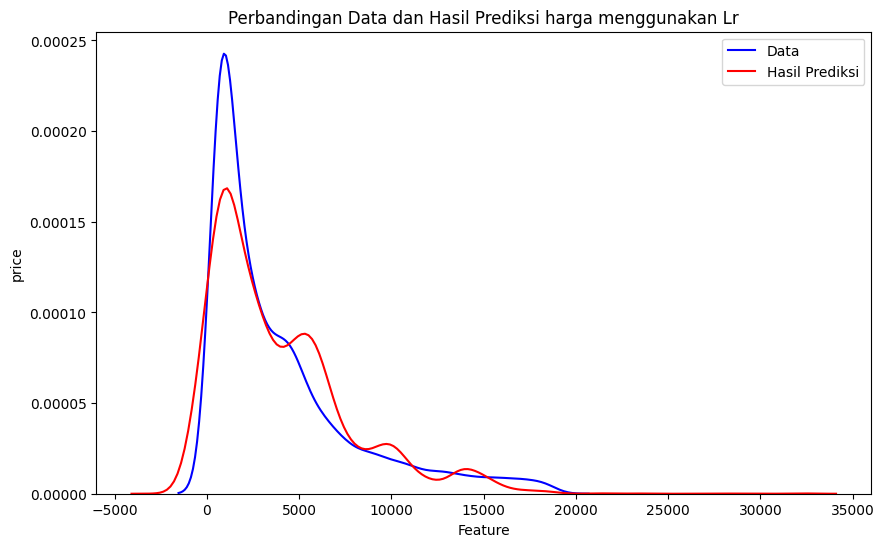

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Data', color='blue')
sns.kdeplot(Y_pred_LR, label='Hasil Prediksi', color='red')
plt.xlabel('Feature')
plt.ylabel('price')
plt.legend()
plt.title('Perbandingan Data dan Hasil Prediksi harga menggunakan Lr')
plt.show()

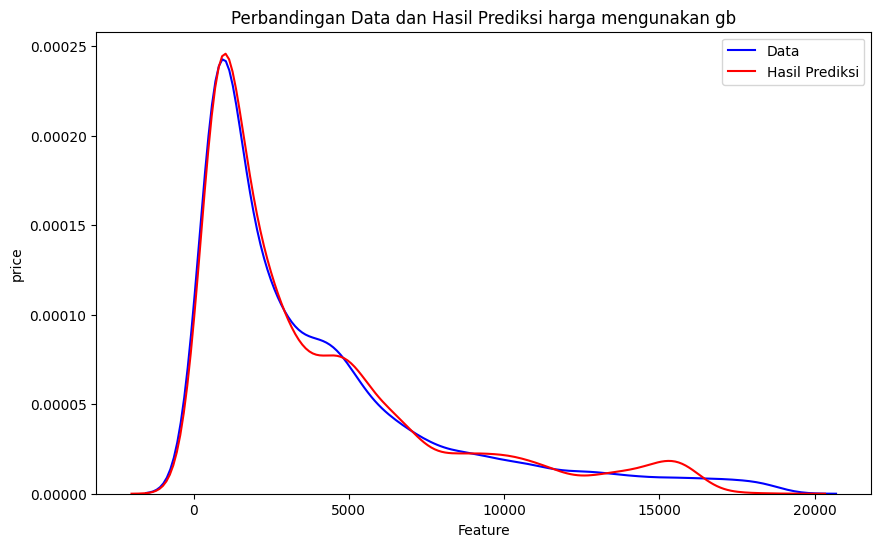

In [36]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Data', color='blue')
sns.kdeplot(y_pred_gb, label='Hasil Prediksi', color='red')
plt.xlabel('Feature')
plt.ylabel('price')
plt.legend()
plt.title('Perbandingan Data dan Hasil Prediksi harga mengunakan gb')
plt.show()

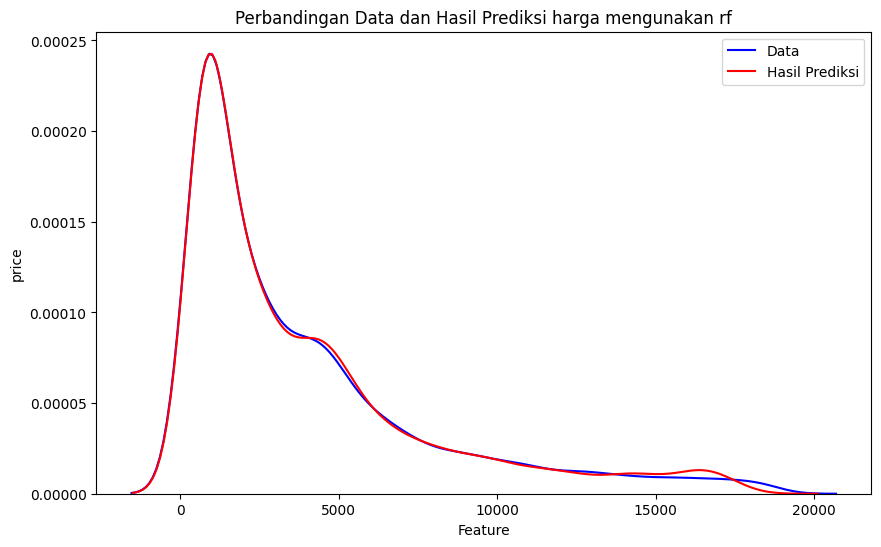

In [37]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Data', color='blue')
sns.kdeplot(y_pred_rf, label='Hasil Prediksi', color='red')
plt.xlabel('Feature')
plt.ylabel('price')
plt.legend()
plt.title('Perbandingan Data dan Hasil Prediksi harga mengunakan rf')
plt.show()

## Membuat Cros validasi 

Linear Regression 10-fold Cross-Validation MSE: 1837416.49 ± 139237.92
Random Forest 10-fold Cross-Validation MSE: 304758.71 ± 6450.15
Gradient Boosting 10-fold Cross-Validation MSE: 462499.16 ± 25231.10

Linear Regression Test MSE: 1825912.99
Linear Regression Test R2 0.89

Gradient Boosting Test MSE: 429935.70
Gradient Boosting Test R2: 0.97

Random Forest Test MSE: 293916.68
Random Forest Test R2: 0.98


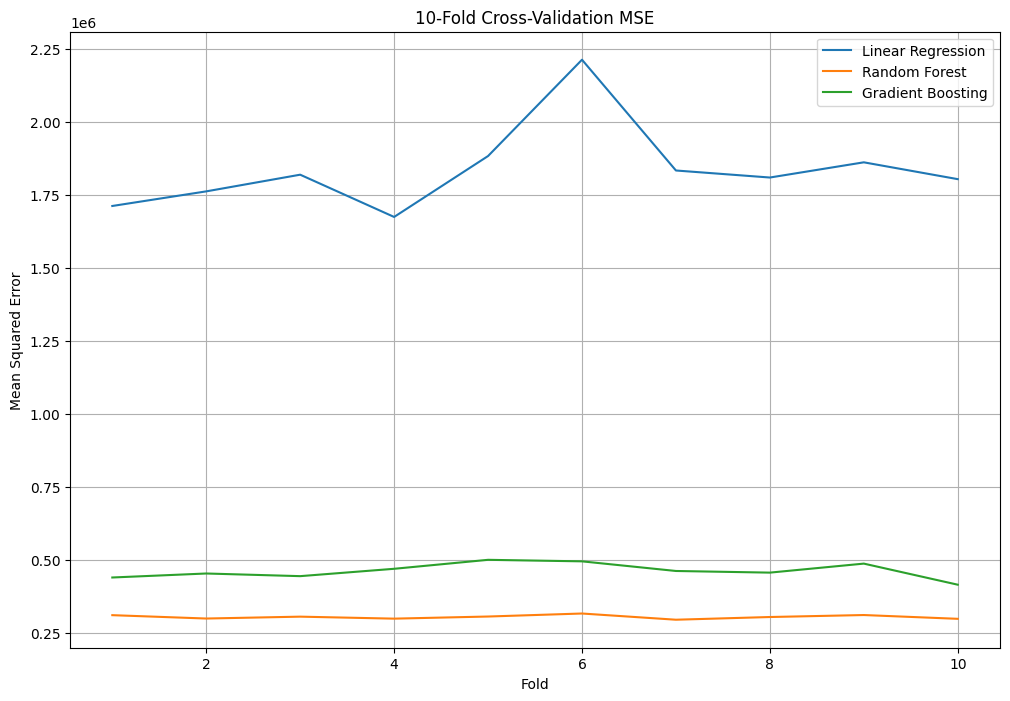

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# inisiasi model
lin_reg = LinearRegression()
gb_reg = GradientBoostingRegressor()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Define 10 kfold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metric unutk regression
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# malakukan 10-fold cross-validation
lin_reg_scores = cross_val_score(lin_reg, X_train, y_train, cv=kf, scoring=scoring)
rf_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring=scoring)
gb_scores = cross_val_score(gb_reg, X_train, y_train, cv=kf, scoring=scoring)

# emlatih models di training data
lin_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb_reg.fit(X_train, y_train)

# Predict di test data
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)

# Calkulasi MSE
test_mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
test_mse_gb = mean_squared_error(y_test, y_pred_gb)
test_r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
test_r2_rf = r2_score(y_test, y_pred_rf)
test_r2_gb =r2_score(y_test, y_pred_gb)

# Print cross-validation dan test MSE
print("Linear Regression 10-fold Cross-Validation MSE: {:.2f} ± {:.2f}".format(-lin_reg_scores.mean(), lin_reg_scores.std()))
print("Random Forest 10-fold Cross-Validation MSE: {:.2f} ± {:.2f}".format(-rf_scores.mean(), rf_scores.std()))
print("Gradient Boosting 10-fold Cross-Validation MSE: {:.2f} ± {:.2f}\n".format(-gb_scores.mean(), gb_scores.std()))

print("Linear Regression Test MSE: {:.2f}".format(test_mse_lin_reg))
print("Linear Regression Test R2 {:.2f}\n".format(test_r2_lin_reg))

print("Gradient Boosting Test MSE: {:.2f}".format(test_mse_gb))
print("Gradient Boosting Test R2: {:.2f}\n".format(test_r2_gb))

print("Random Forest Test MSE: {:.2f}".format(test_mse_rf))
print("Random Forest Test R2: {:.2f}".format(test_r2_rf))
# Plotting  cross-validation 
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), -lin_reg_scores, label='Linear Regression')
plt.plot(range(1, 11), -rf_scores, label='Random Forest')
plt.plot(range(1, 11), -gb_scores, label='Gradient Boosting')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('10-Fold Cross-Validation MSE')
plt.legend()
plt.grid(True)
plt.show()


# membuat prediksi dg Rf

In [39]:
# Data baru yang ingin di-prediksi
X_new = [[0.86,	'Premium','H','SI2',61.0,58.0,6.15,6.12,3.74]]

# Salin data baru untuk diubah
X_new_encoded = X_new.copy()

# Terapkan encoder untuk kolom 'cut', 'color', dan 'clarity'
X_new_encoded[0][1] = label_encoders['cut'].transform([X_new[0][1]])[0]
X_new_encoded[0][2] = label_encoders['color'].transform([X_new[0][2]])[0]
X_new_encoded[0][3] = label_encoders['clarity'].transform([X_new[0][3]])[0]

# Tampilkan data setelah encoding
X_new_encoded

[[0.86, np.int64(3), np.int64(4), np.int64(3), 61.0, 58.0, 6.15, 6.12, 3.74]]

In [40]:
X_new_scaled = scaler.transform(X_new_encoded)

# Prediksi dengan model
y_pred_new = rf.predict(X_new_scaled)

# Menampilkan hasil prediksi
print("Hasil prediksi untuk data baru:")
print(y_pred_new)

Hasil prediksi untuk data baru:
[2768.22]


d:\Projek\Predeksi_Harga\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74
